In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ImageHash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 4.9 MB/s eta 0:00:00


In [3]:
# Import libraries
import os
from PIL import Image
import imagehash
import shutil

In [4]:
# Deduplication function using DCT and pHash
def deduplicate_images_phash(input_dir, output_dir, threshold=5):
    os.makedirs(output_dir, exist_ok=True)
    seen_hashes = {}
    kept = 0
    removed = 0

    for filename in sorted(os.listdir(input_dir)):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(input_dir, filename)
            try:
                img = Image.open(filepath).convert('RGB')
                hash_val = imagehash.phash(img)

                is_duplicate = any(hash_val - h < threshold for h in seen_hashes)

                if not is_duplicate:
                    seen_hashes[hash_val] = filename
                    shutil.copy(filepath, os.path.join(output_dir, filename))
                    kept += 1
                else:
                    removed += 1

            except Exception as e:
                print(f"Error processing {filename}: {e}")

    print(f"Done for: {input_dir}")
    print(f"Kept: {kept} | Removed: {removed} | Total: {kept + removed}")

In [5]:
# Deduplication function using DWT and wHash
def deduplicate_images_whash(input_dir, output_dir, threshold=5):
    os.makedirs(output_dir, exist_ok=True)
    seen_hashes = {}
    kept = 0
    removed = 0

    for filename in sorted(os.listdir(input_dir)):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(input_dir, filename)
            try:
                img = Image.open(filepath).convert('RGB')

                # Use Wavelet Hash instead of Perceptual Hash
                hash_val = imagehash.whash(img)

                is_duplicate = any(hash_val - h < threshold for h in seen_hashes)

                if not is_duplicate:
                    seen_hashes[hash_val] = filename
                    shutil.copy(filepath, os.path.join(output_dir, filename))
                    kept += 1
                else:
                    removed += 1

            except Exception as e:
                print(f"Error processing {filename}: {e}")

    print(f"Done for: {input_dir}")
    print(f"Kept: {kept} | Removed: {removed} | Total: {kept + removed}")

In [6]:
# Deduplicate Dermatofibroma
# Step 1: Deduplicate Dermatofibroma using pHash
deduplicate_images_phash(
    input_dir="/content/drive/MyDrive/GAN-BarlowTwins/synthetic_balanced/Dermatofibroma",
    output_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Dermatofibroma_pHash10",
    threshold=10
)

# Step 2: Deduplicate the pHash-filtered output using wHash
deduplicate_images_whash(
    input_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Dermatofibroma_pHash10",
    output_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step2_pHash_wHash/Dermatofibroma_pHash_wHash10",
    threshold=10
)

Done for: /content/drive/MyDrive/GAN-BarlowTwins/synthetic_balanced/Dermatofibroma
Kept: 6493 | Removed: 97 | Total: 6590
Done for: /content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Dermatofibroma_pHash10
Kept: 2461 | Removed: 4032 | Total: 6493


In [7]:
# Deduplicate Vascular_Lesions
# Step 1: Deduplicate Vascular_Lesions using pHash
deduplicate_images_phash(
    input_dir="/content/drive/MyDrive/GAN-BarlowTwins/synthetic_balanced/Vascular_Lesions",
    output_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Vascular_Lesions_pHash10",
    threshold=10
)

# Step 2: Deduplicate the pHash-filtered output using wHash
deduplicate_images_whash(
    input_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Vascular_Lesions_pHash10",
    output_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step2_pHash_wHash/Vascular_Lesions_pHash_wHash10",
    threshold=10
)

Done for: /content/drive/MyDrive/GAN-BarlowTwins/synthetic_balanced/Vascular_Lesions
Kept: 5065 | Removed: 1498 | Total: 6563
Done for: /content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Vascular_Lesions_pHash10
Kept: 3016 | Removed: 2049 | Total: 5065


In [8]:
# Deduplicate Melanoma
# Step 1: Deduplicate Melanoma using pHash
deduplicate_images_phash(
    input_dir="/content/drive/MyDrive/GAN-BarlowTwins/synthetic_balanced/Melanoma",
    output_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Melanoma_pHash10",
    threshold=10
)

# Step 2: Deduplicate the pHash-filtered output using wHash
deduplicate_images_whash(
    input_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Melanoma_pHash10",
    output_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step2_pHash_wHash/Melanoma_pHash_wHash10",
    threshold=10
)

Done for: /content/drive/MyDrive/GAN-BarlowTwins/synthetic_balanced/Melanoma
Kept: 5384 | Removed: 208 | Total: 5592
Done for: /content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Melanoma_pHash10
Kept: 2782 | Removed: 2602 | Total: 5384


In [10]:
# Deduplicate Actinic Keratosis
# Step 1: Deduplicate Actinic Keratosis using pHash
deduplicate_images_phash(
    input_dir="/content/drive/MyDrive/GAN-BarlowTwins/synthetic_balanced/Actinic Keratoses",
    output_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Actinic Keratosis_pHash10",
    threshold=10
)

# Step 2: Deduplicate the pHash-filtered output using wHash
deduplicate_images_whash(
    input_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Actinic Keratosis_pHash10",
    output_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step2_pHash_wHash/Actinic Keratosis_pHash_wHash10",
    threshold=10
)

Done for: /content/drive/MyDrive/GAN-BarlowTwins/synthetic_balanced/Actinic Keratoses
Kept: 6297 | Removed: 81 | Total: 6378
Done for: /content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Actinic Keratosis_pHash10
Kept: 3574 | Removed: 2723 | Total: 6297


In [11]:
# Deduplicate Basal Cell Carcinoma
# Step 1: Deduplicate Basal Cell Carcinoma using pHash
deduplicate_images_phash(
    input_dir="/content/drive/MyDrive/GAN-BarlowTwins/synthetic_balanced/Basal Cell Carcinoma",
    output_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Basal Cell Carcinoma_pHash10",
    threshold=10
)

# Step 2: Deduplicate the pHash-filtered output using wHash
deduplicate_images_whash(
    input_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Basal Cell Carcinoma_pHash10",
    output_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step2_pHash_wHash/Basal Cell Carcinoma_pHash_wHash10",
    threshold=10
)

Done for: /content/drive/MyDrive/GAN-BarlowTwins/synthetic_balanced/Basal Cell Carcinoma
Kept: 6039 | Removed: 152 | Total: 6191
Done for: /content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Basal Cell Carcinoma_pHash10
Kept: 3836 | Removed: 2203 | Total: 6039


In [12]:
# Deduplicate Benign Keratosis
# Step 1: Deduplicate Benign Keratosis using pHash
deduplicate_images_phash(
    input_dir="/content/drive/MyDrive/GAN-BarlowTwins/synthetic_balanced/Benign Keratosis",
    output_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Benign Keratosis_pHash10",
    threshold=10
)

# Step 2: Deduplicate the pHash-filtered output using wHash
deduplicate_images_whash(
    input_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Benign Keratosis_pHash10",
    output_dir="/content/drive/MyDrive/GAN-BarlowTwins/filtered_step2_pHash_wHash/Benign Keratosis_pHash_wHash10",
    threshold=10
)

Done for: /content/drive/MyDrive/GAN-BarlowTwins/synthetic_balanced/Benign Keratosis
Kept: 5512 | Removed: 94 | Total: 5606
Done for: /content/drive/MyDrive/GAN-BarlowTwins/filtered_step1_pHash/Benign Keratosis_pHash10
Kept: 3149 | Removed: 2363 | Total: 5512


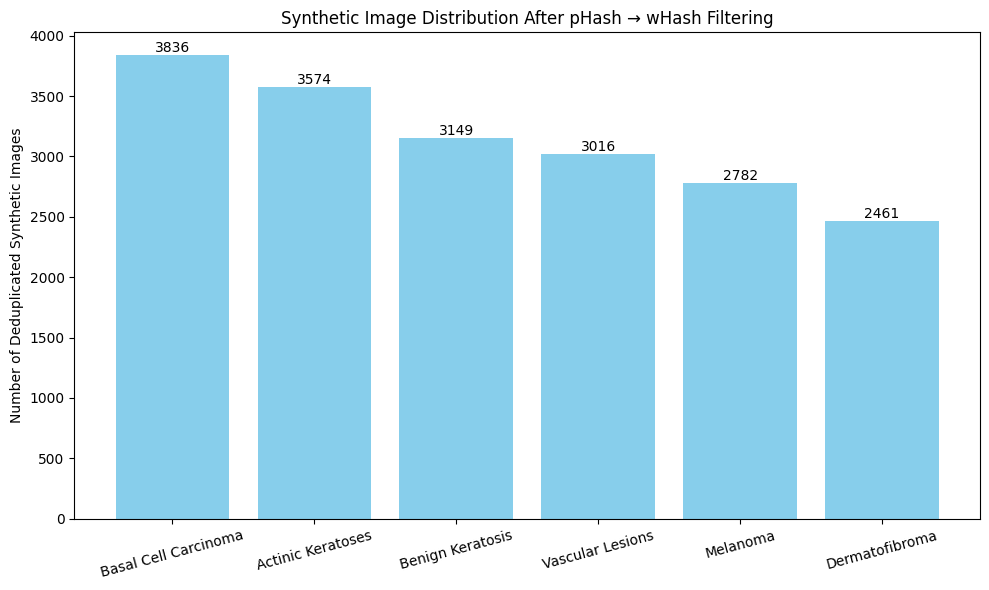

In [16]:
# Count Images and Plot Bar Chart
import os
import matplotlib.pyplot as plt

# Path to final filtered synthetic folders after pHash → wHash
base_dir = "/content/drive/MyDrive/GAN-BarlowTwins/filtered_step2_pHash_wHash"

# Map of class folder names (make sure these match your exact folder names)
class_folders = {
    "Dermatofibroma": "Dermatofibroma_pHash_wHash10",
    "Vascular Lesions": "Vascular_Lesions_pHash_wHash10",
    "Melanoma": "Melanoma_pHash_wHash10",
    "Actinic Keratoses": "Actinic Keratosis_pHash_wHash10",
    "Basal Cell Carcinoma": "Basal Cell Carcinoma_pHash_wHash10",
    "Benign Keratosis": "Benign Keratosis_pHash_wHash10"
}

image_counts = {}

# Count images per class
for class_name, folder in class_folders.items():
    folder_path = os.path.join(base_dir, folder)
    count = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    image_counts[class_name] = count

# Sort by count
sorted_counts = dict(sorted(image_counts.items(), key=lambda x: x[1], reverse=True))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xticks(rotation=15)
plt.ylabel("Number of Deduplicated Synthetic Images")
plt.title("Synthetic Image Distribution After pHash → wHash Filtering")
plt.tight_layout()

# Annotate counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()